# Cover Letter Agent - LangGraph Orchestrator

Human-in-the-loop cover letter generation with memory and checkpointing.

In [1]:
import sys
sys.path.insert(0, '/home/anton/CV_agent')

from graph import create_graph_with_memory, get_graph_visualization

# Create graph with memory checkpointing
graph, memory = create_graph_with_memory()

# Thread ID for this session
THREAD_ID = "session_1"
config = {"configurable": {"thread_id": THREAD_ID}}

print("Graph ready!")
print("Thread:", THREAD_ID)

Graph ready!
Thread: session_1


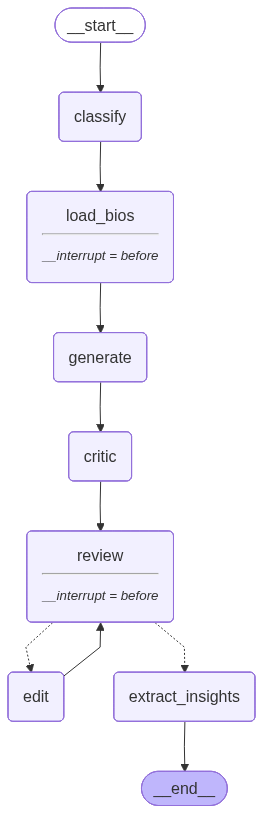

In [2]:
# Visualize the graph
get_graph_visualization(graph)

## Step 1: Job Description

In [ ]:
JOB_DESCRIPTION = """
About Us GSR is crypto’s capital markets partner, helping founders and institutions scale with confidence. With over a decade of specialized expertise, we deliver institutional-grade market making, OTC trading, and strategic venture capital to support growth at every stage. Our value goes beyond execution. We provide access to liquidity, real-time market intelligence, and strategic guidance shaped by years operating at the center of global crypto markets. We bridge the gap between traditional finance and digital assets, connecting teams with the capital, market access, and insights they need to build what’s next.   About the Role As a Quant Trader, you will be at the forefront of creating innovative models and algorithms in the dynamic world of digital assets. Your work will involve generating insights into cryptocurrency market behaviour and developing state-of-the-art automated trading algorithms. You may analyse market microstructure to enhance existing algorithm performance, design or develop advanced computing architectures, and implement new trading strategies. Your contributions will help solve complex business problems using quantitative and technological techniques. Specific responsibilities could include:

analysing market data to improve existing trading algorithms; designing complex computer system architectures; creating new data-driven trading models and algorithms.

Responsibilities
"""
# Develop and implement cutting-edge automated trading algorithms tailored for cryptocurrency markets. Conduct in-depth research and analysis to improve trading strategies and risk-management techniques. Discover patterns through research and translate them into trading signals, validating them through our backtesting environment and rigorous performance analysis. Collaborate with a team of experts to build solutions for automated trading in a rapidly evolving market. Continuously stay informed about emerging trends and technologies in crypto and apply these insights to your work.

# Your Profile

# A degree in Computer Science, Mathematics, Physics, Engineering, Quantitative Finance, or a related technical field. Excellent logical reasoning and analytical skills. Experience writing code to process and analyse large datasets. Proficiency in software development and engineering principles.

# Preferred Qualifications

# Prior experience in electronic trading—ideally within FX or futures—as a developer or researcher. Strong software-development skills, particularly in lower-level languages and Python. Familiarity with the unique aspects of cryptocurrency markets and blockchain technology.

# What We Offer

# A collaborative and transparent company culture founded on Integrity, Innovation, and Performance. Benefits including healthcare, dental, vision, retirement planning, 30 days of holiday, and free lunches when in the office. A hybrid working pattern across our global offices in London, the US, Singapore, Zug, and Málaga. Regular town halls, team lunches, offsites, and social events. A strong Corporate and Social Responsibility programme, including charity matching and volunteer days. Immigration and relocation support where required.


print(f"Job: {len(JOB_DESCRIPTION)} chars")

Job: 3174 chars


In [5]:
# Classify job (pauses before load_bios)
result = graph.invoke({
    "job_description": JOB_DESCRIPTION,
    "approved": False,
    "edit_model": "gpt4o"
}, config)

print(f"Category: {result.get('category', 'N/A').upper()}")
print(f"Confidence: {result.get('confidence', 0)}%")

Category: FINANCE
Confidence: 90%


## Step 2: Confirm Category & Generate

In [7]:
# Optional: override category
graph.update_state(config, {"category": "finance"})

# Continue: load bios -> generate -> critic (pauses before review)
result = graph.invoke(None, config)

state = graph.get_state(config).values
print(f"GPT version: {len(state.get('version_gpt', ''))} chars")
print(f"Claude version: {len(state.get('version_claude', ''))} chars")

KeyError: 'user_dislikes'

## Step 3: Review Versions

In [8]:
state = graph.get_state(config).values

print("="*60)
print("VERSION A (GPT-4o)")
print("="*60)
print(state.get('version_gpt', ''))

print("\n" + "="*60)
print("VERSION B (Claude Sonnet)")
print("="*60)
print(state.get('version_claude', ''))

VERSION A (GPT-4o)
As a data scientist specializing in extracting meaningful insights from complex datasets, I am eager to bring my expertise in time-series analysis, Monte Carlo simulations, and robust data pipeline engineering to the Quant Trader role at GSR. My recent work at BAM involved developing end-to-end data pipelines that significantly enhanced signal detection in noisy environments. I implemented ensemble models and synthetic data augmentation techniques, achieving a measurable improvement in rare event detection, a skill set I am keen to apply to identify market patterns and regime shifts in cryptocurrency trading.

My independent research experience has honed my ability to tackle intricate data-driven challenges. At Friedrich-Schiller-Universität Jena, I independently designed a polarimetry-based device for non-invasive glucose detection, building a digital twin using Monte Carlo methods to optimize experimental design. These experiences have equipped me with the skills n

## Step 4: Review Analysis & Fusion

In [9]:
state = graph.get_state(config).values

print("="*60)
print("CRITIC ANALYSIS")
print("="*60)
print(state.get('analysis_text', 'N/A'))

print("\n" + "="*60)
print("FUSION LETTER")
print("="*60)
print(state.get('current_letter', 'N/A'))

CRITIC ANALYSIS
**VERSION A - Strengths:**
1. **Specific technical achievements**: Clearly states "measurable improvement in rare event detection" and "significantly enhanced signal detection," providing concrete evidence of impact.
2. **Direct role alignment**: Explicitly connects skills to trading applications ("identify market patterns and regime shifts in cryptocurrency trading").
3. **Strong narrative flow**: Smoothly transitions from current work to independent research to motivation for GSR.

**VERSION A - Weaknesses:**
1. **Vague quantification**: Uses phrases like "significantly enhanced" without specific metrics or percentages.
2. **Limited technical depth**: Mentions tools (Python, PyTorch) but doesn't demonstrate deep expertise or implementation details.
3. **Generic closing**: Final paragraph could apply to many fintech companies rather than showcasing unique fit with GSR.

**VERSION B - Strengths:**
1. **Quantified impact**: "Order-of-magnitude improvements in signal-to-n

## Step 5: Provide Feedback

In [10]:
# Fill in your review
USER_SCORE = 8
USER_LIKES = """Strong opening, good structure"""
USER_DISLIKES = """less generic, now it has this is where I thrive, I am eager.. Use human language, not cliches. Your task with data are really interesting for me, plus working in quant field seems very beneficial for me as you have a lot of data to work with and nice salary conditions, that is what i really like. I am already know that I like working with data and like making good money, so we already have a match. Letter could be shorter more catchy. """
APPROVE = False  # True = save, False = edit
EDIT_MODEL = "claude_opus"  # or "claude_opus"

graph.update_state(config, {
    "user_score": USER_SCORE,
    "user_likes": USER_LIKES,
    "user_dislikes": USER_DISLIKES,
    "approved": APPROVE,
    "edit_model": EDIT_MODEL
})

print(f"Score: {USER_SCORE}/10")
print(f"Action: {'APPROVE' if APPROVE else 'EDIT with ' + EDIT_MODEL}")

Score: 8/10
Action: EDIT with claude_opus


In [11]:
# Continue execution
result = graph.invoke(None, config)
state = graph.get_state(config).values

if state.get('final_letter'):
    print("="*60)
    print("FINAL LETTER")
    print("="*60)
    print(state['final_letter'])
    print("\nInsights extracted to insights.json")
else:
    print("="*60)
    print(f"EDITED (Round {state.get('edit_rounds', 0)})")
    print("="*60)
    print(state.get('current_letter', ''))
    print("\nUpdate feedback above and re-run.")

EDITED (Round 1)
At BAM, I built machine learning systems that detect rare defects in nuclear waste containers—a problem where missing a single anomaly has serious consequences. My ensemble models combining CNNs, Random Forests, and SVMs achieved order-of-magnitude improvements in signal detection from noisy thermal data. The technical challenge of extracting meaningful patterns from complex time series while maintaining extremely low false negative rates mirrors the precision required in trading systems. I developed these solutions independently, from initial research through production deployment, including GPU-accelerated training pipelines and real-time performance monitoring.

Your quantitative research challenges genuinely excite me—cryptocurrency markets generate massive, rich datasets that demand sophisticated analysis. The combination of interesting data problems and compensation that actually reflects the value created makes this field particularly appealing. I've proven I ca

## Export to DOCX

In [12]:
from docx import Document
from docx.shared import Pt
from pathlib import Path
from datetime import datetime

def save_to_docx(text, filename=None):
    doc = Document()
    style = doc.styles['Normal']
    style.font.size = Pt(14)
    style.font.name = 'Calibri'
    
    for para in text.split('\n\n'):
        if para.strip():
            doc.add_paragraph(para.strip()).style = style
    
    if not filename:
        filename = f"cover_letter_{datetime.now().strftime('%Y%m%d_%H%M%S')}.docx"
    
    path = Path("/home/anton/CV_agent") / filename
    doc.save(path)
    print(f"Saved: {path}")

state = graph.get_state(config).values
letter = state.get('final_letter') or state.get('current_letter')
if letter:
    save_to_docx(letter)
else:
    print("No letter yet.")

Saved: /home/anton/CV_agent/cover_letter_20260208_145603.docx


## View Insights

In [ ]:
from memory import load_insights
import json
print(json.dumps(load_insights(), indent=2))

## New Session

In [ ]:
# Change THREAD_ID and re-run from Step 1
# THREAD_ID = "session_2"
# config = {"configurable": {"thread_id": THREAD_ID}}